In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# -----------------------------
# Physical parameters
# -----------------------------
L = 1.0                 # slab thickness (m)
alpha = 1.0             # thermal diffusivity (m^2/s)

T_initial = 350.0       # initial temperature (K)
T_left = 300.0          # left boundary temperature (K)
T_right = 400.0         # right boundary temperature (K)

# Times at which we want solution (seconds)
output_times = [1, 5, 10, 50, 100]

In [3]:
# -----------------------------
# Spatial discretization
# -----------------------------
N = 51                          # number of spatial nodes
dx = L / (N - 1)                # spatial step size

x = np.linspace(0, L, N)        # spatial grid

print(f"dx = {dx}")

dx = 0.02


In [4]:
# -----------------------------
# Time discretization (stability)
# -----------------------------
Fo = 0.4                          # choose safely below 0.5
dt = Fo * dx**2 / alpha           # time step from stability

print(f"dt = {dt:.6f} s")
print(f"Fourier number = {Fo}")

dt = 0.000160 s
Fourier number = 0.4


In [6]:
# --------------------------------------------------
# Initialize temperature field at time t = 0
# --------------------------------------------------

# Create an array of length N where all nodes
# are initially at the uniform temperature T_initial
T_old = np.ones(N) * T_initial

# Apply Dirichlet boundary condition at x = 0
# Left boundary temperature is fixed at T_left
T_old[0] = T_left

# Apply Dirichlet boundary condition at x = L
# Right boundary temperature is fixed at T_right
T_old[-1] = T_right

# Create a separate array to store temperature
# values at the next time step (t + dt)
# .copy() ensures T_new is independent of T_old
T_new = T_old.copy()

In [8]:
T_old

array([300., 350., 350., 350., 350., 350., 350., 350., 350., 350., 350.,
       350., 350., 350., 350., 350., 350., 350., 350., 350., 350., 350.,
       350., 350., 350., 350., 350., 350., 350., 350., 350., 350., 350.,
       350., 350., 350., 350., 350., 350., 350., 350., 350., 350., 350.,
       350., 350., 350., 350., 350., 350., 400.])

In [9]:
T_new

array([300., 350., 350., 350., 350., 350., 350., 350., 350., 350., 350.,
       350., 350., 350., 350., 350., 350., 350., 350., 350., 350., 350.,
       350., 350., 350., 350., 350., 350., 350., 350., 350., 350., 350.,
       350., 350., 350., 350., 350., 350., 350., 350., 350., 350., 350.,
       350., 350., 350., 350., 350., 350., 400.])

In [10]:
# --------------------------------------------------
# Storage for temperature profiles at specified times
# --------------------------------------------------

# Dictionary to store temperature distributions
# Key   -> time (s)
# Value -> temperature profile T(x)
stored_results = {}

# Initialize simulation time
current_time = 0.0

In [25]:
# --------------------------------------------------
# Explicit finite difference time-marching loop
# --------------------------------------------------

# Maximum simulation time (we only simulate up to 100 s)
max_time = max(output_times)

# Total number of time steps required
n_steps = int(max_time / dt)

# Numerical tolerance to handle floating point errors
tolerance = dt / 2

# Time marching loop
for step in range(n_steps):

    # ----------------------------------------------
    # Update temperature at interior spatial nodes
    # ----------------------------------------------
    for i in range(1, N - 1):
        T_new[i] = (
            T_old[i]
            + Fo * (T_old[i + 1] - 2.0 * T_old[i] + T_old[i - 1])
        )

    # ----------------------------------------------
    # Reapply boundary conditions at new time level
    # ----------------------------------------------
    T_new[0] = T_left
    T_new[-1] = T_right

    # ----------------------------------------------
    # Update simulation time
    # ----------------------------------------------
    current_time += dt

    # ----------------------------------------------
    # Store temperature profiles at required times
    # ----------------------------------------------
    for t_req in output_times:
        if t_req not in stored_results and current_time >= t_req:
            stored_results[t_req] = T_new.copy()


    # ----------------------------------------------
    # Prepare for next time step
    # ----------------------------------------------
    T_old[:] = T_new[:]

    # ----------------------------------------------
    # Stop early if all required times are captured
    # ----------------------------------------------
    if len(stored_results) == len(output_times):
        break

In [26]:
max_time

100

In [27]:
n_steps

625000

In [28]:
T_old[:]

array([300., 302., 304., 306., 308., 310., 312., 314., 316., 318., 320.,
       322., 324., 326., 328., 330., 332., 334., 336., 338., 340., 342.,
       344., 346., 348., 350., 352., 354., 356., 358., 360., 362., 364.,
       366., 368., 370., 372., 374., 376., 378., 380., 382., 384., 386.,
       388., 390., 392., 394., 396., 398., 400.])

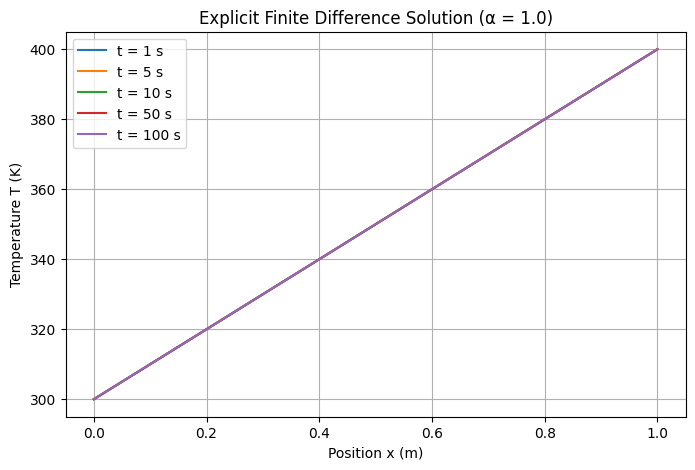

In [29]:
# --------------------------------------------------
# Plot temperature profiles at specified times
# --------------------------------------------------

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Plot temperature distribution for each stored time
for t in output_times:
    plt.plot(x, stored_results[t], label=f"t = {t} s")

# Axis labels
plt.xlabel("Position x (m)")
plt.ylabel("Temperature T (K)")

# Title
plt.title(f"Explicit Finite Difference Solution (α = {alpha})")

# Legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [30]:
print("Stored times:", stored_results.keys())

Stored times: dict_keys([1, 5, 10, 50, 100])
